In [104]:
using Plots
pyplot()
using MyBioTools.FluTools
using TreeTools
using StatsBase
using Dates
using Measures
include("../../../make_all_plots.jl")

Pfix_vs_fitness (generic function with 1 method)

In [95]:
plot(rand(10));

In [109]:
lfs = 16 # Legend font size
alfs = 20 # axis label font size
tfs = 16 # title font size
atfs = 22 # axis ticks font size
ga = 0.3 # grid alpha
sizes = (1200,800) # standard size for single plots
rl = 0.065 # position of the "A" or "B" label in % 
ms = 6 # marker size
ls = 6 # line size
plotfolder = "General_OLD"

"General"

# Number of sequences 

In [97]:
# binwidth = Day(15);
# binspacing = Month(1);
sp = FluTools.StrainPop("../../data/aligned_h3n2_ha_aa.fasta");

In [98]:
binwidth = Year(1);
binspacing = Year(1);
FluTools.bin_by_date!(sp, binwidth=binwidth, binspacing = binspacing);

In [99]:
spr = Dict()
for r in FluTools.nextstrain_regions
    spr[r] = FluTools.StrainPop(strains = FluTools.filterstrains(sp, regions = [r]));
end

In [100]:
#
styles = filter((s->begin
                s in Plots.supported_styles()
            end), [:solid, :dash, :dot, :dashdot, :dashdotdot])
styles = reshape(styles, 1, length(styles))

1×4 Array{Symbol,2}:
 :solid  :dash  :dot  :dashdot

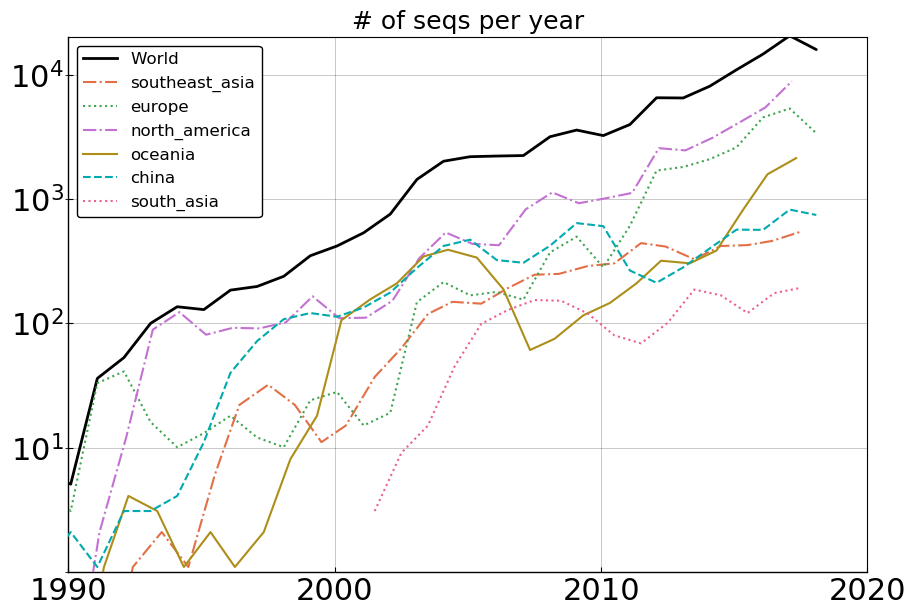

In [9]:
# Dates
X = collect(keys(sp.datebin))
X = [x[1] + div(x[2]-x[1],2) for x in X] 
X = [year(x) + month(x)/12. for x in X]
tmp = sortperm(X)
# Numbers
Y = length.(collect(values(sp.datebin)))
# 
X = X[tmp]; Y = Y[tmp]
p = plot(X,Y .+1e-1, line=(:black, 2), label="World")

# By regions
region_list = ("north_america","china","south_asia","japan","europe","southeast_asia","oceania")
for (i,(r,spt)) in enumerate(spr)
    FluTools.bin_by_date!(spt, binwidth=binwidth, binspacing = binspacing);
    X = collect(keys(spt.datebin))
    X = [x[1] + div(x[2]-x[1],2) for x in X] 
    X = [year(x) + month(x)/12. for x in X]
    tmp = sortperm(X)
    Y = length.(collect(values(spt.datebin)))
    X = X[tmp]; Y = Y[tmp]
    if in(r,region_list)
        plot!(p, X, Y .+1e-1, label="$r", line=(1.5, styles[mod(i,4)+1]))
    end
end
plot!(p, xlim = (1990,2020), ylim=(1,20000), title="# of seqs per year", size=(900,600), yscale=:log10)
plot!(p, yticks=[10,100,1000,10000])
plot!(p, framestyle=:box, legendfontsize=12, tickfontsize=atfs, guidefontsize=alfs, gridalpha=ga, titlefontsize=18)
savefig("$(plotfolder)/Nseq_per_year.png")

# Typical trajectories

In [101]:
sp = FluTools.StrainPop("../../data/aligned_h3n2_ha_aa.fasta")
binwidth = Day(60);
binspacing = Day(120);
FluTools.bin_by_date!(sp, start = Date(2001), binwidth=binwidth, binspacing = binspacing);

In [105]:
ph_all = FluTools.positions_history(sp);

In [106]:
entropies = Float64[]
for p in ph_all
    push!(entropies, mean(values(FluTools.entropy(p))))
end
ph_var = ph_all[sortperm(entropies, rev=true)][1:9];

In [111]:
plist = []
for (i,p) in enumerate(ph_var)
    tmp = plot_all_trajectories([p], yearticks=true)
    plot!(tmp, title="$(p.i)", frame=:box, size = (600,400))
    plot!(tmp, framestyle=:box, legendfontsize=16, tickfontsize=atfs, guidefontsize=alfs, gridalpha=ga, legend=:topright, titlefontsize=20)
    plot!(tmp, xlim=(1999,2023),  xticks=[1990,1995,2000,2005,2010,2015,2020])
    if mod(i,3)!=1
        plot!(tmp, ytickfontsize=0)
    end
    if i <= 6
        plot!(tmp, xtickfontsize=0)
#         print("xticks  ")
    end
#     println(i, " ", p.i)
    push!(plist, tmp)
end

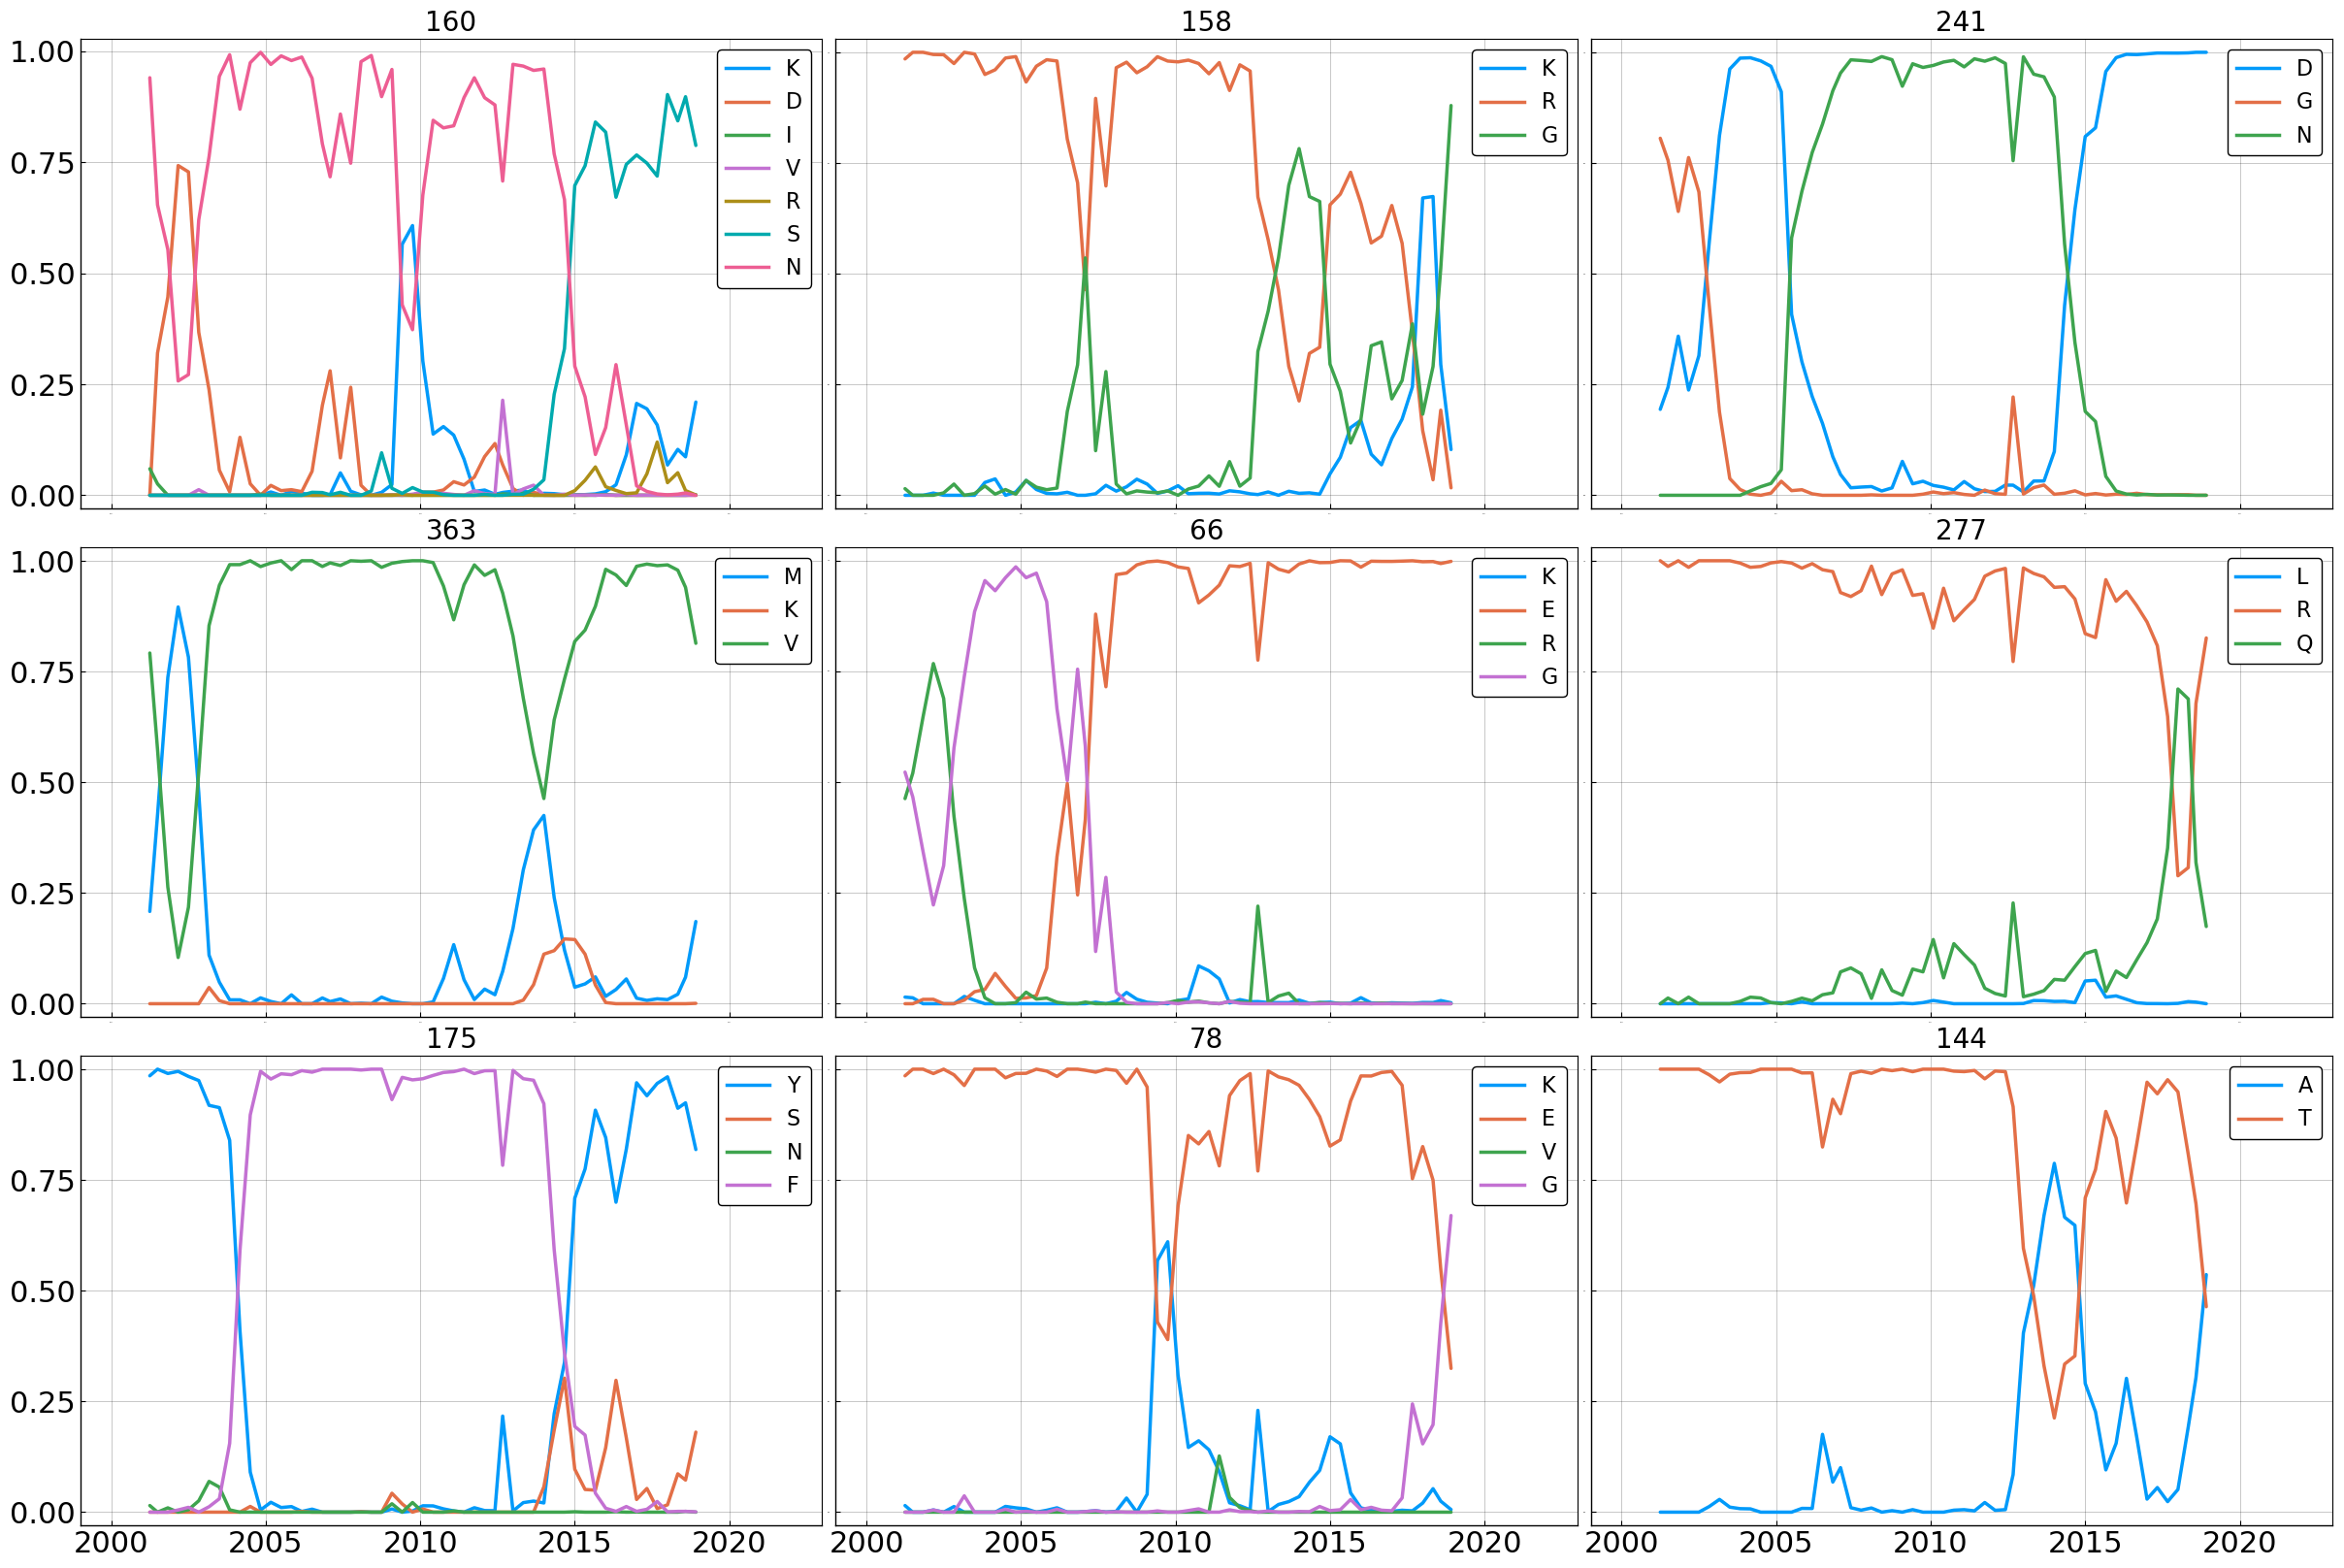

In [112]:
plot(plist..., layout = (3,3), size=(2400,1600))
savefig("$(plotfolder)/Trajectories_layout.png")

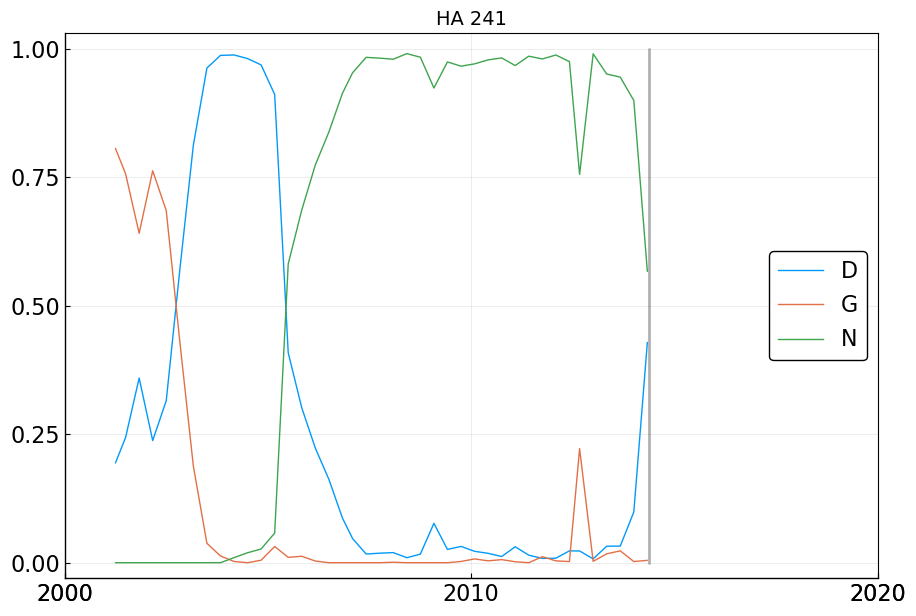

In [15]:
i = 3
z = ph_var[i]
X,Y,tmp = FluTools.frequency_plot(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2014.5, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(z.alphabet[a])", color=a)
#     plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="$(z.alphabet[a])", line=[:dashdot], linewidth=1.5, color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs,legend=:right)
savefig("$(plotfolder)/traj_i$(z.i)_nofuture.png")

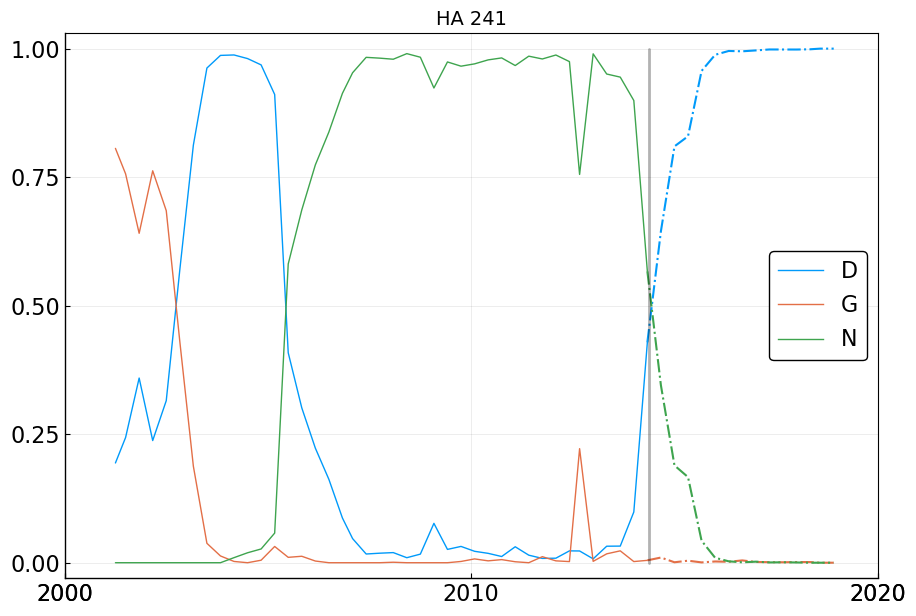

In [16]:
i = 3
z = ph_var[i]
X,Y,tmp = FluTools.frequency_plot(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2014.5, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(z.alphabet[a])", color=a)
    plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="", line=[:dashdot], linewidth=1.5, color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs)
savefig("$(plotfolder)/traj_i$(z.i)_withfuture.png")

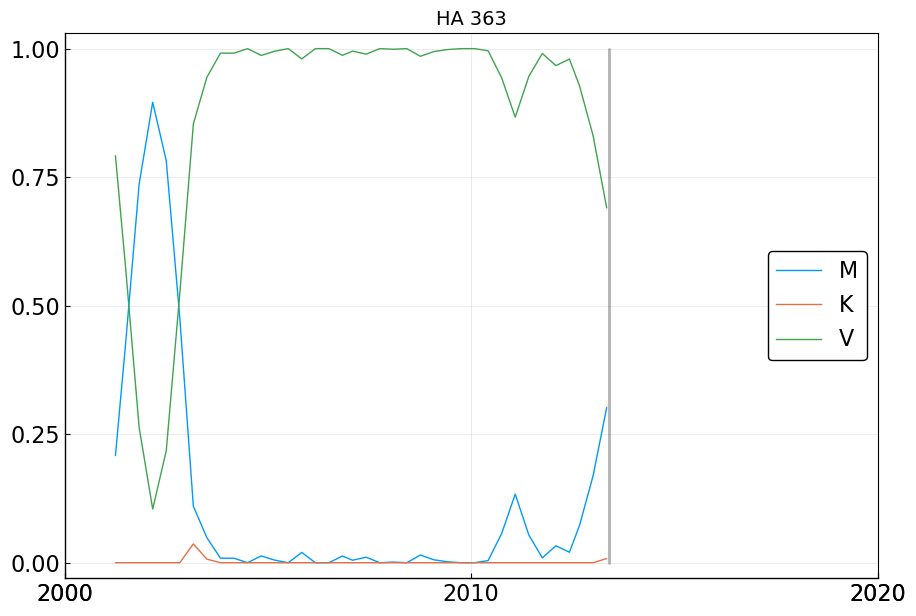

In [17]:
i = 4
z = ph_var[i]
X,Y,tmp = FluTools.frequency_plot(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2013.6, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(z.alphabet[a])", color=a)
#     plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="$(z.alphabet[a])", line=[:dashdot], linewidth=1.5, color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs, legend=:right)
savefig("$(plotfolder)/traj_i$(z.i)_nofuture.png")

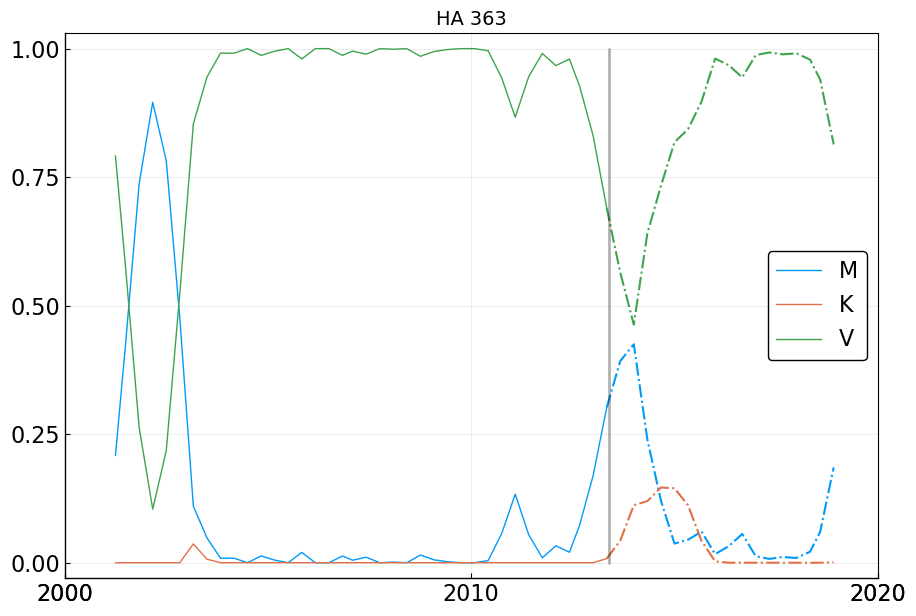

In [18]:
i = 4
z = ph_var[i]
X,Y,tmp = FluTools.frequency_plot(z)
X = [year(x) + month(x) /12. for x in X]
idx = findall(x->x<=2013.6, X)
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X[idx], Y[idx,a], label="$(z.alphabet[a])", color=a)
    plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="", line=[:dashdot], linewidth=1.5, color=a)
end
plot!(p,[X[idx[end]]+0.05,X[idx[end]]+0.05], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p,xlim = (2000,2020),frame=:box, title="HA $(z.i)", tickfontsize=tfs, legendfontsize=lfs)
savefig("$(plotfolder)/traj_i$(z.i)_withfuture.png")

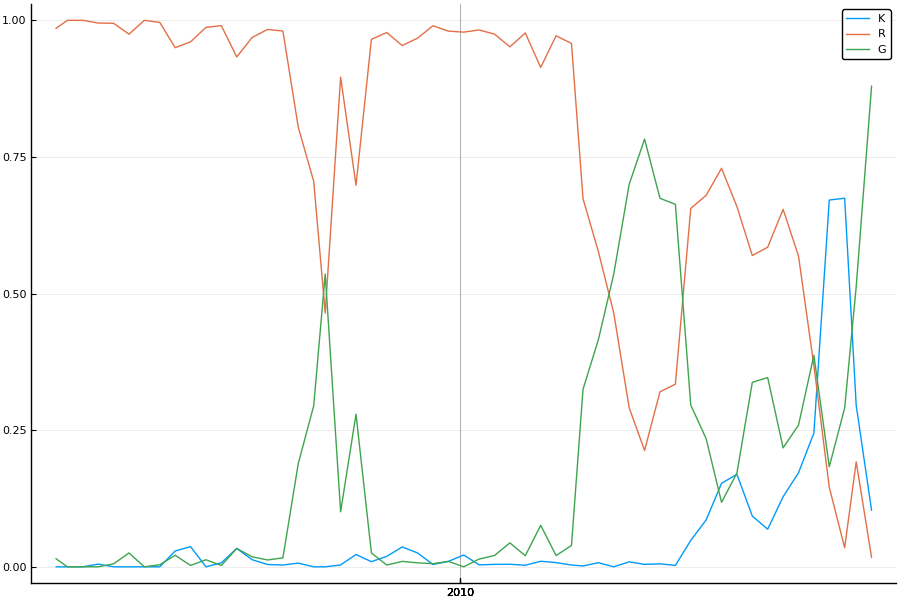

In [19]:
z = FluTools.positions_history(158, sp)
X,Y,tmp = FluTools.frequency_plot(z)
X = [year(x) + month(x) /12. for x in X]
p = plot(size=(900,600))
for a in 1:size(Y,2)
	plot!(p, X, Y[:,a], label="$(z.alphabet[a])", color=a)
#     plot!(p, X[max(idx...):end], Y[max(idx...):end,a], label="$(z.alphabet[a])", line=[:dashdot], linewidth=1.5, color=a)
end
p

In [20]:
X,Y,Z = FluTools.frequency_plot(ph_all[241]);

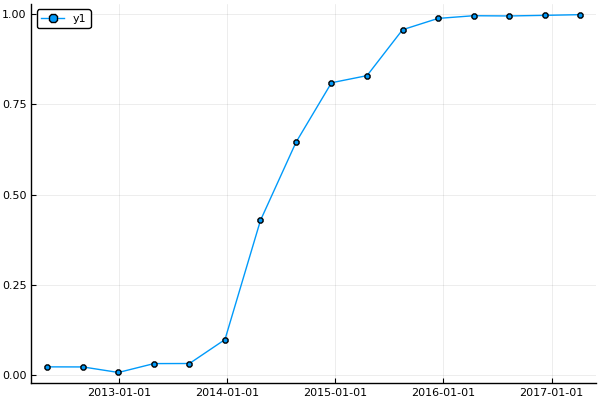

In [25]:
idx = 35:50
plot(X[idx],Y[idx,1], marker=:o)

In [22]:
length(X)

55

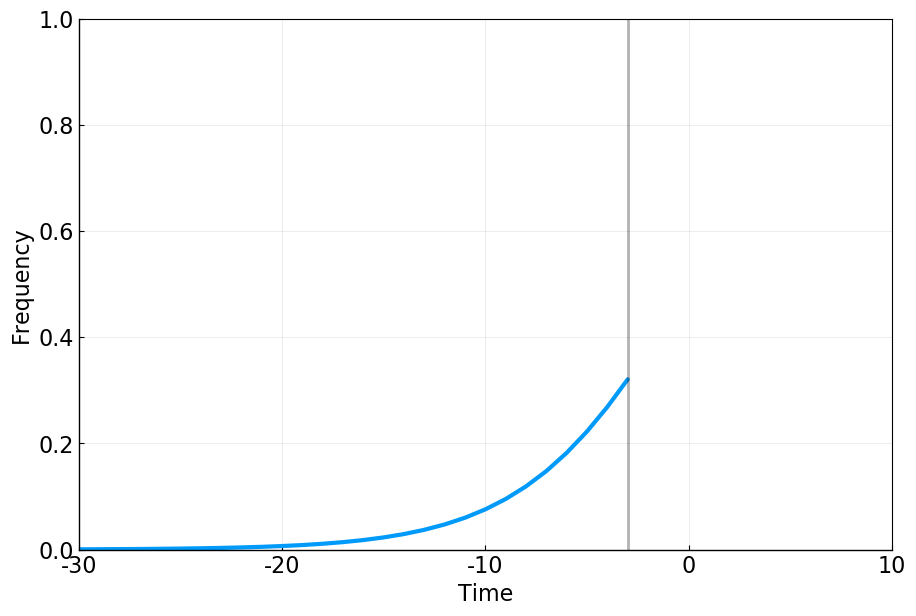

In [63]:
f(x,xe) = exp(x/xe) / (1+exp(x/xe)) 
X = -30:-3
Y = f.(X,4)
x2 = -3:0
#
p = plot(X,Y,ylim=(0,1),xlim=(-30,10), size=(900,600), label="", linewidth=3)
plot!(p,[-3,-3], [0,1], line=(2, :black),label="", alpha=0.3)
plot!()
plot!(p, xtickfontsize=0, xlabel="Time",ylabel="Frequency", frame=:box)
plot!(guidefontsize=alfs, tickfontsize=tfs)
savefig("$plotfolder/ideal_trajectory.png")

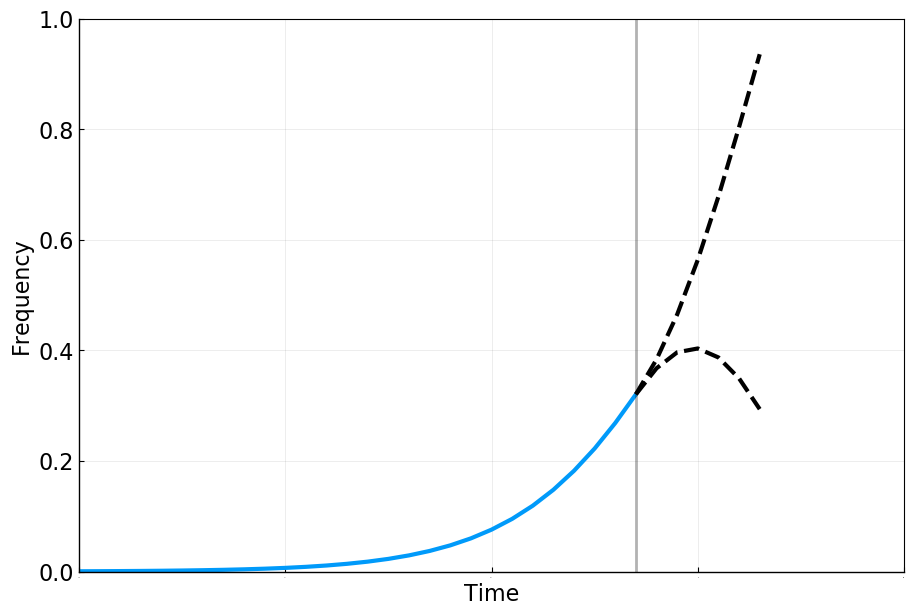

In [93]:
f(x,xe) = exp(x/xe) / (1+exp(x/xe)) 
g(x) = x^2/2
X = -30:-3
Y = f.(X,4)
x2 = -3:3
#
p = plot(X,Y,ylim=(0,1),xlim=(-30,10), size=(900,600), label="", linewidth=3)
plot!(p,[-3,-3], [0,1], line=(2, :black),label="", alpha=0.3)
plot!(p, x2, -3*(f.(x2,4) .- Y[end]).^2 + f.(x2,4), line=(3,:dash, :black), label="")
plot!(p, x2, 2*(f.(x2,4) .- Y[end]).^2 + f.(x2,4), line=(3,:dash, :black), label="")
plot!(guidefontsize=alfs, tickfontsize=tfs)
plot!(p, xtickfontsize=0, xlabel="Time",ylabel="Frequency", frame=:box)
savefig("$plotfolder/ideal_trajectory.png")

In [64]:
?g

search: gr ga get gcd GC gui gif GR gap get! gcdx grid gray Gap gperm green Gray

Couldn't find g
Perhaps you meant ga, gr, X, Y, Z, f, i, p, z, !, %, &, *, +, -, /, :, <, > or \


No documentation found.

Binding `g` does not exist.
